# Спрос на рейсы авиакомпании

Задача понять предпочтения пользователей, покупающих билеты на разные направления.

Требуется изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

In [ ]:
SELECT
    aircrafts.model AS model, 
    COUNT(subquery.flight_id) AS flights_amount
FROM
    aircrafts
    INNER JOIN (
        SELECT
            *
        FROM
            flights
        WHERE
            flights.departure_time :: date BETWEEN '2018-09-01' AND '2018-09-30'
) AS subquery ON subquery.aircraft_code = aircrafts.aircraft_code
GROUP BY
    aircrafts.model


In [ ]:
SELECT
    subquery.city, 
    AVG(subquery.flights_per_day) AS average_flights
FROM
     (
        SELECT
            airports.city, 
            EXTRACT(DAY FROM flights.arrival_time :: date) AS day_of_august,
            COUNT(flights.flight_id) AS flights_per_day
        FROM
            flights
            INNER JOIN airports ON airports.airport_code = flights.arrival_airport
        WHERE
            DATE_TRUNC('month', flights.arrival_time :: date) = '2018-08-01'
        GROUP BY
            city,
            day_of_august
     ) AS subquery
GROUP BY
    city;


## Импорт и проверки

In [2]:
pip install squarify

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import squarify
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib

In [4]:
df_plane = pd.read_csv('/datasets/query_1.csv')
df_city = pd.read_csv('/datasets/query_3.csv')

In [26]:
def first_check(data):
    print('---ВИЗУАЛИЗАЦИЯ ТАБЛИЦЫ---')
    print(' ')
    print(data.head())
    print(' ')
    print('---ТИПЫ И КОЛИЧЕСТВО ДАННЫХ---')
    print(' ')
    print(data.info())
    print(' ')
    print('---ДУБЛИКАТЫ---')
    print(' ')
    print(data.duplicated().sum())
    print(' ')
    print('---ПРОПУСКИ---')
    print(' ')
    print(data.isna().sum())
    

In [27]:
first_check(df_city)

---ВИЗУАЛИЗАЦИЯ ТАБЛИЦЫ---
 
          city  average_flights
0       Абакан         3.870968
1      Анадырь         1.000000
2        Анапа         2.161290
3  Архангельск         5.354839
4    Астрахань         2.451613
 
---ТИПЫ И КОЛИЧЕСТВО ДАННЫХ---
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None
 
---ДУБЛИКАТЫ---
 
0
 
---ПРОПУСКИ---
 
city               0
average_flights    0
dtype: int64


In [4]:
df_plane.head(10)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [5]:
df_city.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [6]:
df_plane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [7]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [8]:
df_plane.duplicated().sum()

0

In [9]:
df_city.duplicated().sum()

0

In [10]:
df_plane.isna().sum()

model             0
flights_amount    0
dtype: int64

In [11]:
df_city.isna().sum()

city               0
average_flights    0
dtype: int64

#### Вывод

Данные импортированы и проверены. Типы данных коректны, пропуски и дубликаты отсутствуют, можно приступать к анализу.

## Визуализация и анализ

In [12]:
df_city_sorted = df_city.sort_values('average_flights', ascending=False).reset_index(drop=True).loc[:9]

print(df_city_sorted)

              city  average_flights
0           Москва       129.774194
1  Санкт-Петербург        31.161290
2      Новосибирск        17.322581
3       Красноярск        11.580645
4     Екатеринбург        11.322581
5   Ростов-на-Дону        10.193548
6            Пермь        10.129032
7           Брянск        10.000000
8             Сочи         9.612903
9        Ульяновск         9.580645


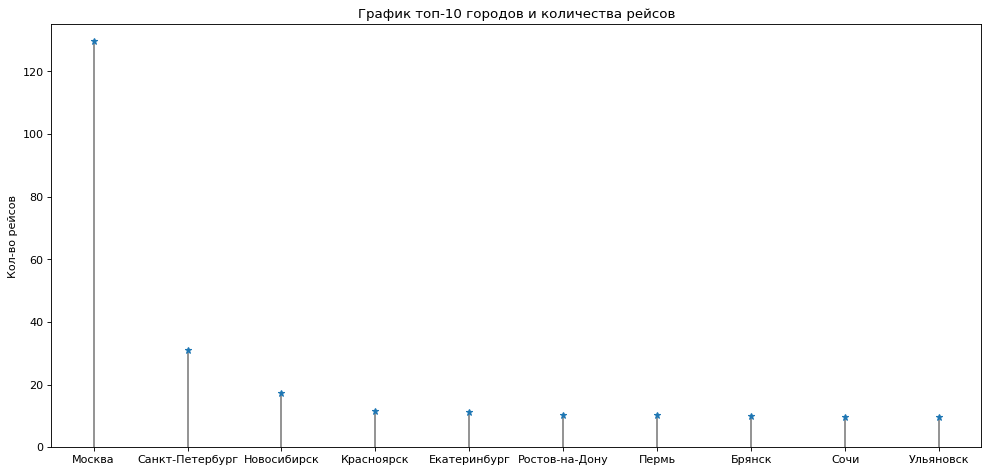

In [13]:
fig, ax = plt.subplots(figsize=(15,7), dpi= 80)
ax.stem(df_city_sorted.city, df_city_sorted.average_flights, basefmt=' ', use_line_collection = True, linefmt ='grey', markerfmt ='*')
ax.set_ylim(0, 135)
ax.set_title('График топ-10 городов и количества рейсов')
ax.set_ylabel('Кол-во рейсов')
plt.show()



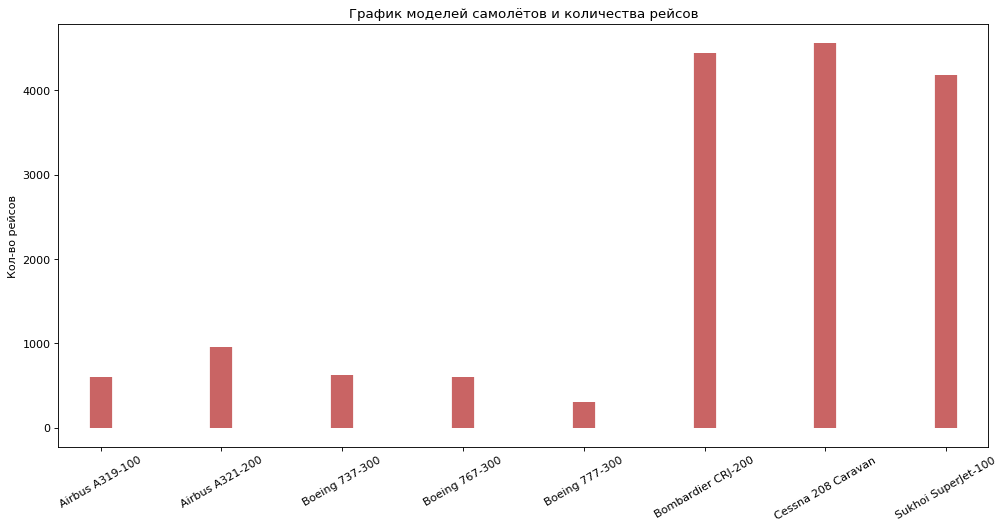

In [14]:
fig, ax = plt.subplots(figsize=(15,7), dpi= 80)
ax.vlines(x = df_plane.model, ymin=0, ymax=df_plane.flights_amount, color='firebrick', alpha=0.7, linewidth=20)
ax.set_title('График моделей самолётов и количества рейсов')
ax.set(ylabel='Кол-во рейсов')
plt.xticks(rotation=30)
plt.show()

In [15]:
df_city = df_city.sort_values('average_flights', ascending=False).reset_index(drop=True)
labels = df_city['city'].to_numpy()
sizes = df_city['average_flights'].values

In [16]:
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

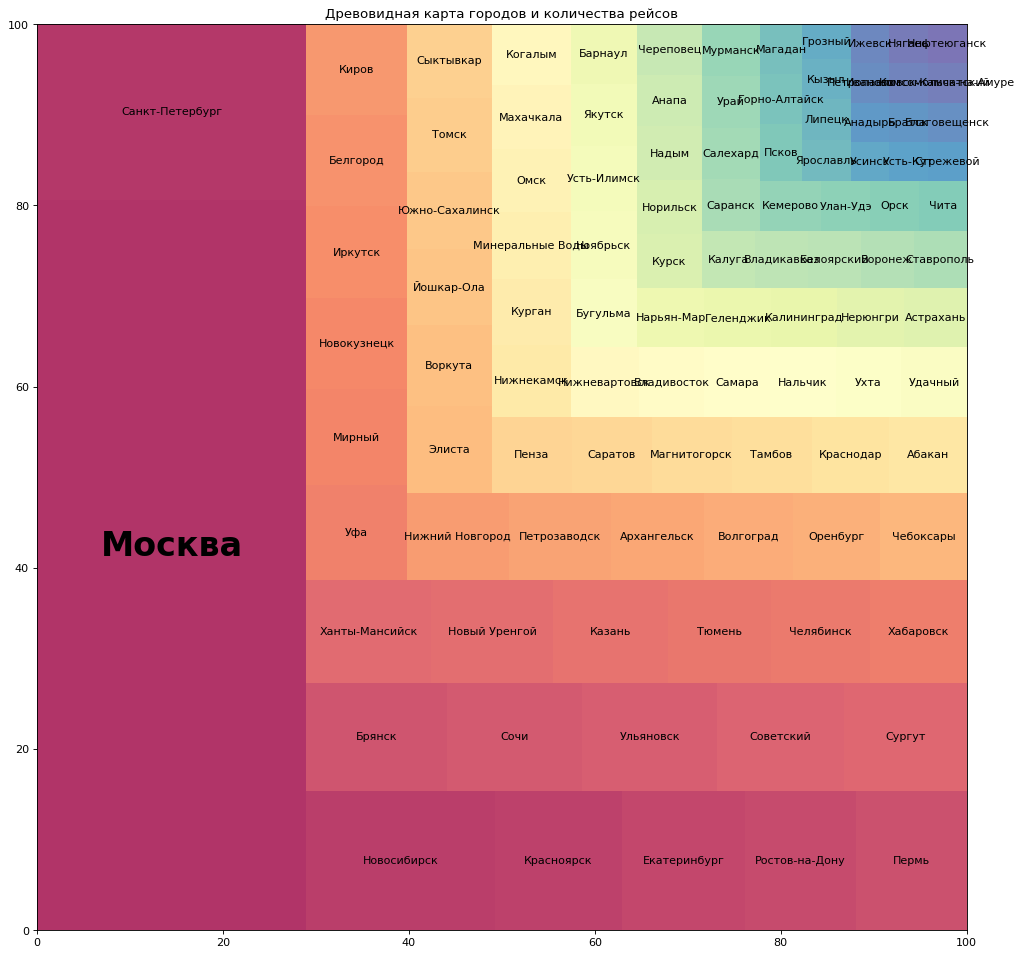

In [17]:
plt.figure(figsize=(15,15), dpi= 80)
ax = squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)
text_parts = ax.texts[0].get_text().split("\n")
ax.texts[0].set_text(text_parts[0] + "\n")
ax.texts[0].set_size(30)
ax.texts[0].set_weight('bold')
ax.set_title('Древовидная карта городов и количества рейсов')
plt.show()

## Вывод

Исходя из той визуализации, которую мы можем наблюдать, москва значительно опережает прочие города по количеству рейсов. Питербург традиционно на втором месте, количество рейсов меньше примерно в 5 раз, Новосибирск почти в 10. Прочие города равномерно убывают по количеству рейсов, в хвосте такие города как Ижевск, Благовещенск, Комсомольск-на-Амуре.

С точки зрения самолётов, тройка лидеров - Сухой, Бомбардьер, Кессна с большим отрывом опережают Боинг и Аирбас. Это интересное наблюдени! Мой опыт говорит о том что Боинг наиболее популярный тип самолётов. Я бы изучил причины почему именно эти самолёты лидируют по кол-ву рейсов.